# Muutoksen suuruuden laskeminen ja sen kuvailu Pythonin avulla

##### Muutoksen ja sen suuruuden kuvailussa käytetään yleensä
 <UL>
    <LI>tunnuslukuja monesta er näkökulmasta laskettuna</LI>
    <LI>viivakuvioita</LI>
    <LI>indeksejä ja niistä muodostettuja viivakuvioita</LI>
    <LI>reaaliarvoja ja viivakuvioita</LI>
    <LI>vertailua edelliseen vuoteen peräkkäisenä muutosprosenttina</LI>
    <LI>vertailua edelliseen vuoteen pylväskuviona</LI>
    </UL>
        

Käydään tässä läpi näitä kuvioita ja niihin liittyviä laskelmia. Datana on käytetty Tilastokeskuksen sivulta www.stat.fi (ks. Avainluvut-osio) haettuja vanhojen osakehuoneistojen hintoja kuukausittain pääkaupunkiseudulta ja muusta Suomesta viimeiseltä noin viideltä vuodelta. 

Haettu data on tallennettu Haaga-Helian myy-palvelimen käyttäjätunnuksen rdi1lh101 hakemiston public_html alihakemistoon Dataa ja tiedoston nimi on Asuntojen_hinnat_viimeisin.xlsx. Siihen viitataan internet-protokollalla http://www.haaga-helia.fi/~rdi1lh101/Dataa/Asuntojen_hinnat_viimeisin.xlsx. Internet käyttäjät ohjataan siis automaattisesti käyttäjien public_html-hakemistoon, muut hakemistot ovat käyttäjän yksityisiä.

Ensimmäisenä otetaan käyttöön Pythonin tarvittava perusohjelmakirjasto pandas, joiden avulla voidaan tehdä laskelmia.

In [1]:
#### Ladataan pandas-kirjasto ja annetaan sille lempinimi pd

import pandas as pd

Otetaan sitten datatiedosto käyttöön.

In [2]:
##### Ladataan asuntojen hinnat sisältävä tiedosto ja annetaan sille nimi hinnat

hinnat = pd.read_excel('http://www.haaga-helia.fi/~rdi1lh101/Dataa/Asuntojen_hinnat_viimeisin.xlsx', sheet_name='Hinnat')

### Katsotaan, miltä sen kahdeksan ensimmäistä riviä näyttävät

hinnat.head(8)


,Ajankohta,Pääkaupunkiseutu (PKS),Muu Suomi (koko maa - PKS)
0,2015M01,3520,1605
1,2015M02,3581,1614
2,2015M03,3689,1639
3,2015M04,3597,1622
4,2015M05,3565,1636
5,2015M06,3544,1666
6,2015M07,3509,1661
7,2015M08,3555,1616


In [3]:
#### Tässä näkyvätkin sarakkeiden nimet. Ne voi myös tulostaa

hinnat.columns

Index(['Ajankohta', 'Pääkaupunkiseutu (PKS)', 'Muu Suomi (koko maa - PKS)'], dtype='object')

In [4]:
#### Muutetaan sarakkeiden nimet kirjoitusvirheille vähemmän alttiiksi mutta silti kuvaaviksi

hinnat.columns = ['Ajankohta', 'Pääkaupunkiseutu', 'Muu Suomi']

#### Ja tarkistetaan lopputulos

hinnat.columns

Index(['Ajankohta', 'Pääkaupunkiseutu', 'Muu Suomi'], dtype='object')

In [5]:
#### Seuraavaksi Tilastokeskuksen datan päiväysmuotoilu pitää muuttaa ymmärrettäväksi.

#### Ensin riisutaan aineistossa oleva * pois luvun yhteydestä

hinnat['Ajankohta'] = hinnat['Ajankohta'].astype(str).str.strip('*')

#### Ladataan uusi kirjasto käyttöön kuukauden viimeisen päivän saamiseksi

from pandas.tseries.offsets import MonthEnd

#### Muutetaan Ajankohta-sarakkeen ilmaisu vastaavaksi kuukauden viimeiseksi päivämääräksi

hinnat['Ajankohta'] = pd.to_datetime(hinnat['Ajankohta'], format='%YM%m') + MonthEnd(0)

#### Katsotaan, miltä kahdeksan ensimmäistä riviä näyttää

#### Huomaathan, että indeksöinti alkaa nollasta. Näin aina.

hinnat.head(8)


,Ajankohta,Pääkaupunkiseutu,Muu Suomi
0,2015-01-31,3520,1605
1,2015-02-28,3581,1614
2,2015-03-31,3689,1639
3,2015-04-30,3597,1622
4,2015-05-31,3565,1636
5,2015-06-30,3544,1666
6,2015-07-31,3509,1661
7,2015-08-31,3555,1616


In [6]:
#### Lopuksi indeksöidään noiden päivämäärien mukaan

hinnat.index = hinnat['Ajankohta']

In [7]:
##### Tarkistetaan ensimmäiset kahdeksan riviä.
##### Huomaathan, että indeksöinti alkaa aina nollasta.

hinnat.head(8)


,Ajankohta,Pääkaupunkiseutu,Muu Suomi
Ajankohta,,,
2015-01-31,2015-01-31,3520,1605
2015-02-28,2015-02-28,3581,1614
2015-03-31,2015-03-31,3689,1639
2015-04-30,2015-04-30,3597,1622
2015-05-31,2015-05-31,3565,1636
2015-06-30,2015-06-30,3544,1666
2015-07-31,2015-07-31,3509,1661
2015-08-31,2015-08-31,3555,1616


In [8]:
##### Tarkistetaan viimeiset kuusi riviä

hinnat.tail(6)

,Ajankohta,Pääkaupunkiseutu,Muu Suomi
Ajankohta,,,
2019-04-30,2019-04-30,3962,1673
2019-05-31,2019-05-31,4051,1689
2019-06-30,2019-06-30,4118,1720
2019-07-31,2019-07-31,3962,1724
2019-08-31,2019-08-31,3959,1663
2019-09-30,2019-09-30,3825,1618


Lasketaan seuraavaksi tunnuslukuja näille luvuille.

In [9]:
##### Tunnusluvut pääkaupunkiseudun ja muun Suomen vanhojen osakehuoneistojen vuosien 2015--2019 hinnoille

#### Huomaathan, että mediaani ilmaistaan 50 % prosenttipisteenä.

hinnat.describe()


,Pääkaupunkiseutu,Muu Suomi
count,57.000000,57.000000
mean,3769.614035,1637.192982
std,173.029493,36.400765
min,3509.000000,1565.000000
25%,3630.000000,1615.000000
50%,3781.000000,1636.000000
75%,3883.000000,1661.000000
max,4118.000000,1724.000000


In [10]:
#### Yllä olevassa esitysmuodossa lukuja on hankala hahmottaa, kun desimaaleja on niin monta.

#### Lasketaan tunnusluvut kuten yllä, mutta esitetään tulokset kahdella desimaalilla

#### Kirjoitetaan luvut kahdella desimaalilla käyttäen style-muotoiluja.

hinnat.describe().style.format('{:.2f}')

,Pääkaupunkiseutu,Muu Suomi
count,57.00,57.00
mean,3769.61,1637.19
std,173.03,36.40
min,3509.00,1565.00
25%,3630.00,1615.00
50%,3781.00,1636.00
75%,3883.00,1661.00
max,4118.00,1724.00


In [11]:
#### Tehdään näihin vielä yksi lisäys, otetaan lisäargumentilla useampia prosenttipisteet käyttöön

#### Seuraavassa käytetään 10 %, 25 %, 75 % ja 90 % prosenttipisteitä, muitakin voi lisätä samalla tavalla.

hinnat.describe(percentiles = [.1,.25,.75,.9]).style.format('{:.2f}')


,Pääkaupunkiseutu,Muu Suomi
count,57.00,57.00
mean,3769.61,1637.19
std,173.03,36.40
min,3509.00,1565.00
10%,3541.20,1592.20
25%,3630.00,1615.00
50%,3781.00,1636.00
75%,3883.00,1661.00
90%,3998.40,1679.80
max,4118.00,1724.00


Tunnuslukuja voidaan laskea ja ryhmitellä eri tavoin. Lasketaan seuraavaksi vuosittaiset ja kuukausittaiset tunnusluvut kummallekin alueelle erikseen.

In [12]:
##### Lasketaan hintojen tunnuslukuja pääkaunkiseudulle vuosittain

#### Kirjoitetaan luvut kahdella desimaalilla käyttäen style-muotoiluja.

hinnat.groupby(hinnat['Ajankohta'].dt.year)['Pääkaupunkiseutu'].describe(percentiles = [.1,.25,.75,.9]).style.format('{:.2f}')


,count,mean,std,min,10%,25%,50%,75%,90%,max
Ajankohta,,,,,,,,,,
2015,12.00,3584.92,66.94,3509.00,3510.10,3538.00,3573.00,3609.00,3684.60,3711.00
2016,12.00,3621.50,60.79,3533.00,3533.40,3579.75,3643.00,3657.00,3680.10,3714.00
2017,12.00,3788.42,73.21,3630.00,3681.90,3773.25,3800.00,3840.00,3849.60,3883.00
2018,12.00,3904.33,67.37,3781.00,3844.10,3867.50,3896.50,3960.75,3987.30,4011.00
2019,9.00,4008.67,92.74,3825.00,3932.20,3962.00,4014.00,4087.00,4103.60,4118.00


In [13]:
##### Lasketaan vastaavasti hintojen tunnuslukuja muulle Suomelle vuosittain

hinnat.groupby(hinnat['Ajankohta'].dt.year)['Muu Suomi'].describe(percentiles = [.1,.25,.75,.9]).style.format('{:.2f}')


,count,mean,std,min,10%,25%,50%,75%,90%,max
Ajankohta,,,,,,,,,,
2015,12.00,1618.75,29.01,1565.00,1588.20,1603.50,1615.50,1636.75,1658.80,1666.00
2016,12.00,1616.00,23.71,1572.00,1585.20,1604.25,1621.00,1625.00,1635.80,1661.00
2017,12.00,1640.50,34.64,1587.00,1604.00,1613.00,1638.50,1660.00,1685.80,1698.00
2018,12.00,1652.67,32.00,1591.00,1618.70,1637.75,1655.00,1672.25,1673.90,1714.00
2019,9.00,1665.00,43.10,1593.00,1613.00,1651.00,1663.00,1689.00,1720.80,1724.00


In [14]:
##### Lasketaan sitten hintojen tunnuslukuja kuukausittain
##### Ensin pääkaupunkiseutu

hinnat.groupby(hinnat['Ajankohta'].dt.month)['Pääkaupunkiseutu'].describe(percentiles = [.1,.25,.75,.9]).style.format('{:.2f}')


,count,mean,std,min,10%,25%,50%,75%,90%,max
Ajankohta,,,,,,,,,,
1,5.00,3712.80,240.28,3520.00,3525.20,3533.00,3630.00,3781.00,3972.40,4100.00
2,5.00,3766.00,204.07,3581.00,3607.00,3646.00,3672.00,3844.00,3989.80,4087.00
3,5.00,3778.00,181.19,3537.00,3597.80,3689.00,3774.00,3876.00,3958.80,4014.00
4,5.00,3789.00,153.19,3597.00,3631.00,3682.00,3790.00,3914.00,3942.80,3962.00
5,5.00,3788.20,215.87,3565.00,3576.60,3594.00,3771.00,3960.00,4014.60,4051.00
6,5.00,3824.00,248.11,3544.00,3570.00,3609.00,3838.00,4011.00,4075.20,4118.00
7,5.00,3745.00,211.84,3509.00,3518.60,3533.00,3810.00,3911.00,3941.60,3962.00
8,5.00,3766.40,164.14,3555.00,3595.00,3655.00,3781.00,3882.00,3928.20,3959.00
9,5.00,3776.00,150.64,3594.00,3617.20,3652.00,3825.00,3846.00,3916.20,3963.00


In [15]:
##### Lasketaan sitten hintojen tunnuslukuja kuukausittain muualla Suomessa

hinnat.groupby(hinnat['Ajankohta'].dt.month)['Muu Suomi'].describe(percentiles = [.1,.25,.75,.9]).style.format('{:.2f}')


,count,mean,std,min,10%,25%,50%,75%,90%,max
Ajankohta,,,,,,,,,,
1,5.00,1604.60,14.67,1587.00,1589.40,1593.00,1605.00,1618.00,1619.20,1620.00
2,5.00,1629.60,20.56,1607.00,1609.80,1614.00,1625.00,1651.00,1651.00,1651.00
3,5.00,1620.80,31.25,1584.00,1586.80,1591.00,1636.00,1639.00,1648.00,1654.00
4,5.00,1633.60,28.43,1596.00,1606.40,1622.00,1632.00,1645.00,1661.80,1673.00
5,5.00,1664.00,32.21,1625.00,1629.40,1636.00,1672.00,1689.00,1694.40,1698.00
6,5.00,1662.60,39.57,1616.00,1624.40,1637.00,1666.00,1674.00,1701.60,1720.00
7,5.00,1681.20,42.12,1620.00,1636.40,1661.00,1687.00,1714.00,1720.00,1724.00
8,5.00,1638.80,18.74,1616.00,1619.60,1625.00,1641.00,1649.00,1657.40,1663.00
9,5.00,1624.80,25.94,1587.00,1599.40,1618.00,1622.00,1642.00,1649.80,1655.00


Mitä vanhojen osakehuoneistojen neliöhinnoille on näiden laskelmien perusteella tapahtunut? Kuinka suuria muutokset ovat olleet ja mihin suuntaan ne ovat vaikuttaneet?

Vaikuttaako myyntikuukausi näiden laskelmien perusteella neliöhintaan?
Jos vaikuttaa, kuinka suuri vaikutus on?

### Lasketaan seuraavaksi indeksejä

Indeksejä laskettaessa jokin ajankohta valitaan aluksi perusajankohdaksi. Muiden ajankohdan arvoja verrataan sitten perusajankohdan arvoon. Näiden arvojen suhdeluku kerrotaan sadalla.

Valitaan tässä perusajankohdaksi vuoden 2015 tammikuu.

In [16]:
#### Lisätään taulukkoon uudet sarakkeet indeksilukuja varten
#### Ensin pääkaupunkiseudun hintaindeksit

hinnat['PKS indeksi'] = hinnat['Pääkaupunkiseutu'] / hinnat['Pääkaupunkiseutu'].iloc[0] * 100


In [17]:
##### Katsotaan, näyttävätkö laskelmat oikean suuntaisilta

hinnat.head()

,Ajankohta,Pääkaupunkiseutu,Muu Suomi,PKS indeksi
Ajankohta,,,,
2015-01-31,2015-01-31,3520,1605,100.000000
2015-02-28,2015-02-28,3581,1614,101.732955
2015-03-31,2015-03-31,3689,1639,104.801136
2015-04-30,2015-04-30,3597,1622,102.187500
2015-05-31,2015-05-31,3565,1636,101.278409


In [18]:
##### Katsotaan, näyttävätkö laskelmat oikean suuntaisilta

hinnat.tail()

,Ajankohta,Pääkaupunkiseutu,Muu Suomi,PKS indeksi
Ajankohta,,,,
2019-05-31,2019-05-31,4051,1689,115.085227
2019-06-30,2019-06-30,4118,1720,116.988636
2019-07-31,2019-07-31,3962,1724,112.556818
2019-08-31,2019-08-31,3959,1663,112.471591
2019-09-30,2019-09-30,3825,1618,108.664773


In [19]:
##### Tehdään sama muun Suomen hinnoille

#### Lisätään taulukkoon uusi sarake muun Suomen hintojen indeksilukuja varten

#### Listan ensimmäinen luku kiinnitetään argumentilla iloc[0].

hinnat['Muu Suomi indeksi'] = hinnat['Muu Suomi'] / hinnat['Muu Suomi'].iloc[0] * 100


In [20]:
##### Katsotaan, näyttävätkö laskelmat oikean suuntaisilta

hinnat.head()

,Ajankohta,Pääkaupunkiseutu,Muu Suomi,PKS indeksi,Muu Suomi indeksi
Ajankohta,,,,,
2015-01-31,2015-01-31,3520,1605,100.000000,100.000000
2015-02-28,2015-02-28,3581,1614,101.732955,100.560748
2015-03-31,2015-03-31,3689,1639,104.801136,102.118380
2015-04-30,2015-04-30,3597,1622,102.187500,101.059190
2015-05-31,2015-05-31,3565,1636,101.278409,101.931464


In [21]:
##### Katsotaan, näyttävätkö laskelmat oikean suuntaisilta

hinnat.tail()

,Ajankohta,Pääkaupunkiseutu,Muu Suomi,PKS indeksi,Muu Suomi indeksi
Ajankohta,,,,,
2019-05-31,2019-05-31,4051,1689,115.085227,105.233645
2019-06-30,2019-06-30,4118,1720,116.988636,107.165109
2019-07-31,2019-07-31,3962,1724,112.556818,107.414330
2019-08-31,2019-08-31,3959,1663,112.471591,103.613707
2019-09-30,2019-09-30,3825,1618,108.664773,100.809969


Reaaliarvo laskettaessa yleinen hintojen muutoksen vaikutus poistetaan ja jäljellä jää todellinen, reaalinen, muutos.

Tällaisissa tapauksissa lasketaan kaikkien arvojen reaaliarvo samana ajankohtana. Usein käytännön tilanteissa tuo on viimeisin tiedossa oleva ajankohta. Niin myös seuraavissa laskuissa.

Elinkustannusindeksi kuvaa yleisen hintatason muutoksia ja kahden ajankohdan elinkustannusindeksin suhde on kerroin, joka kertoo hintojen muutoksen suuruuden.

Excel-tiedoston toisessa välilehdessä on asuntojen hintojen ajankohtien elinkustannusindeksit. Otetaan ne käyttöön ja lasketaan jokaiselle ajankohdalle kerroin, jolla sen ajankohdan hinta muutetaan viimeisen indeksiluvun ajankohdan rahan arvoa vastaavaksi. 

In [22]:
#### Luetaan elinkustannusindeksit Excel-tiedostosta tietokehykseen.

elinkustannusindeksi = pd.read_excel('http://www.haaga-helia.fi/~rdi1lh101/Dataa/Asuntojen_hinnat_viimeisin.xlsx', sheet_name='Elinkustannusindeksi')

In [23]:
#### Katsotaan, miltä data näyttää alusta

elinkustannusindeksi.head()

,Ajankohta,Pisteluku
0,1951M10,100
1,1951M11,100
2,1951M12,100
3,1952M01,102
4,1952M02,101


In [24]:
#### Katsotaan, miltä data näyttää lopusta

elinkustannusindeksi.tail()

,Ajankohta,Pisteluku
814,2019M08,1973
815,2019M09,1973
816,2019M10,1975
817,2019M11,1973
818,2019M12,1976


In [25]:
#### Ihan hyvältä näyttää, eikö.
#### Lisätään taulukkoon uusi sarake muutoskertoimia varten.
#### Tässä siis lasketaan kerroin, jolla muutetaan hinnat viimeisen kuukauden rahan arvoksi.

#### Listan viimeinen luku kiinnitetään argumentilla iloc[-1].

elinkustannusindeksi['Muutoskerroin'] = elinkustannusindeksi['Pisteluku'].iloc[-1] / elinkustannusindeksi['Pisteluku']

In [26]:
#### Katsotaan lopputulosta alusta

elinkustannusindeksi.head()

,Ajankohta,Pisteluku,Muutoskerroin
0,1951M10,100,19.760000
1,1951M11,100,19.760000
2,1951M12,100,19.760000
3,1952M01,102,19.372549
4,1952M02,101,19.564356


In [27]:
#### Ja lopusta

elinkustannusindeksi.tail()

,Ajankohta,Pisteluku,Muutoskerroin
814,2019M08,1973,1.001521
815,2019M09,1973,1.001521
816,2019M10,1975,1.000506
817,2019M11,1973,1.001521
818,2019M12,1976,1.000000


Näyttää järkevältä ja uskottavalta, eikö. Jatketaan siis.

Lisätään tietokehykseen hinnat alkuperäisiä (nimellisiä) hintoja vastaavat reaaliarvoiset hinnat. Ne on siis laskettu viimeisen indeksin pisteluvun ajankohdan arvoa vastaaviksi.

Jotta kunkin kuukauden neliöhinta löytää oikean kertoimella, jolla se kerrotaan viimeisen ajankohdan rahan arvoksi muutettaessa, tulee elinkustannusindeksi-tietokehyksessä ajankohdat muuttaa päivämääriksi samalla tavalla kuin yllä hinnat-tietokehyksessä.

In [28]:
#### Muutetaan Tilastokeskuksen datan päiväysmuotoilu ymmärrettäväksi.

#### Ensin riisutaan aineistossa oleva * pois luvun yhteydestä

elinkustannusindeksi['Ajankohta'] = elinkustannusindeksi['Ajankohta'].astype(str).str.strip('*')

#### Muutetaan Ajankohta-sarakkeen ilmaisu vastaavaksi kuukauden viimeiseksi päivämääräksi

elinkustannusindeksi['Ajankohta'] = pd.to_datetime(elinkustannusindeksi['Ajankohta'], format='%YM%m') + MonthEnd(0)

#### Katsotaan, mitä tuli tehtyä. Kirjoitetaan siis kahdeksan ensimmäistä riviä näyttää

#### Huomaathan, että indeksöinti alkaa nollasta. Näin aina.

elinkustannusindeksi.head(8)

,Ajankohta,Pisteluku,Muutoskerroin
0,1951-10-31,100,19.760000
1,1951-11-30,100,19.760000
2,1951-12-31,100,19.760000
3,1952-01-31,102,19.372549
4,1952-02-29,101,19.564356
5,1952-03-31,101,19.564356
6,1952-04-30,101,19.564356
7,1952-05-31,101,19.564356


In [29]:
#### Lopuksi indeksöidään noiden päivämäärien mukaan

elinkustannusindeksi.index = elinkustannusindeksi['Ajankohta']

In [30]:
##### Katsotaan taas, mitä onkaan tullut tehtyä.

elinkustannusindeksi

,Ajankohta,Pisteluku,Muutoskerroin
Ajankohta,,,
1951-10-31,1951-10-31,100,19.760000
1951-11-30,1951-11-30,100,19.760000
1951-12-31,1951-12-31,100,19.760000
1952-01-31,1952-01-31,102,19.372549
1952-02-29,1952-02-29,101,19.564356
...,...,...,...
2019-08-31,2019-08-31,1973,1.001521
2019-09-30,2019-09-30,1973,1.001521
2019-10-31,2019-10-31,1975,1.000506


In [31]:
##### Yhdistetään nyt hinnat-tietokehyksen Pääkaupunkiseudun ja Muun Suomen nimellishinnat sekä elinkustannusindeksi-tietokehyksen muutoskertoimet samaan tietokehykseen.

reaaliarvot = pd.concat([hinnat,elinkustannusindeksi], axis = 1)

#### Toinen tapa:
#### reaaliarvot = pd.merge(hinnat, elinkustannusindeksi, how='left', on='Ajankohta')

In [32]:
##### Miltähän näyttää?

reaaliarvot.head()


,Ajankohta,Pääkaupunkiseutu,Muu Suomi,PKS indeksi,Muu Suomi indeksi,Ajankohta,Pisteluku,Muutoskerroin
Ajankohta,,,,,,,,
1951-10-31,NaT,NaN,NaN,NaN,NaN,1951-10-31,100,19.760000
1951-11-30,NaT,NaN,NaN,NaN,NaN,1951-11-30,100,19.760000
1951-12-31,NaT,NaN,NaN,NaN,NaN,1951-12-31,100,19.760000
1952-01-31,NaT,NaN,NaN,NaN,NaN,1952-01-31,102,19.372549
1952-02-29,NaT,NaN,NaN,NaN,NaN,1952-02-29,101,19.564356


In [33]:
##### Miltähän näyttää?

reaaliarvot.tail()

,Ajankohta,Pääkaupunkiseutu,Muu Suomi,PKS indeksi,Muu Suomi indeksi,Ajankohta,Pisteluku,Muutoskerroin
Ajankohta,,,,,,,,
2019-08-31,2019-08-31,3959.0,1663.0,112.471591,103.613707,2019-08-31,1973,1.001521
2019-09-30,2019-09-30,3825.0,1618.0,108.664773,100.809969,2019-09-30,1973,1.001521
2019-10-31,NaT,NaN,NaN,NaN,NaN,2019-10-31,1975,1.000506
2019-11-30,NaT,NaN,NaN,NaN,NaN,2019-11-30,1973,1.001521
2019-12-31,NaT,NaN,NaN,NaN,NaN,2019-12-31,1976,1.000000


Tässä on jo niin monta saraketta, että lukeminen vaikeutuu. Pidetään tässä tietokehyksessä vain reaaliarvojen laskemiseen liittyvät asiat ja poistetaan muut sarakkeet.

In [34]:
##### Poistetaan indeksi-sarakkeet ja pisteluku-sarakkeet

reaaliarvot = reaaliarvot.drop(columns = ['PKS indeksi', 'Muu Suomi indeksi', 'Pisteluku'])

Lisätään tähän sarakkeet Pääkaupunkiseudun ja Muun Suomen asuntojen reaaliarvoille ja lasketaan nuo reaaliarvot.

In [35]:
##### Lasketaan ja lisätään reaaliarvot

reaaliarvot['PKS-reaali'] = reaaliarvot['Pääkaupunkiseutu'] * reaaliarvot['Muutoskerroin']

reaaliarvot['Muu-Suomi-reaali'] = reaaliarvot['Muu Suomi'] * reaaliarvot['Muutoskerroin']

In [36]:
##### Katsotaan, miltä luvut näyttävät ja vaikuttavatko ne oikeilta.

reaaliarvot.head()


,Ajankohta,Pääkaupunkiseutu,Muu Suomi,Ajankohta,Muutoskerroin,PKS-reaali,Muu-Suomi-reaali
Ajankohta,,,,,,,
1951-10-31,NaT,NaN,NaN,1951-10-31,19.760000,NaN,NaN
1951-11-30,NaT,NaN,NaN,1951-11-30,19.760000,NaN,NaN
1951-12-31,NaT,NaN,NaN,1951-12-31,19.760000,NaN,NaN
1952-01-31,NaT,NaN,NaN,1952-01-31,19.372549,NaN,NaN
1952-02-29,NaT,NaN,NaN,1952-02-29,19.564356,NaN,NaN


In [37]:
##### Katsotaan, miltä luvut näyttävät ja vaikuttavatko ne oikeilta.

reaaliarvot.tail()

,Ajankohta,Pääkaupunkiseutu,Muu Suomi,Ajankohta,Muutoskerroin,PKS-reaali,Muu-Suomi-reaali
Ajankohta,,,,,,,
2019-08-31,2019-08-31,3959.0,1663.0,2019-08-31,1.001521,3965.019767,1665.528637
2019-09-30,2019-09-30,3825.0,1618.0,2019-09-30,1.001521,3830.816016,1620.460213
2019-10-31,NaT,NaN,NaN,2019-10-31,1.000506,NaN,NaN
2019-11-30,NaT,NaN,NaN,2019-11-30,1.001521,NaN,NaN
2019-12-31,NaT,NaN,NaN,2019-12-31,1.000000,NaN,NaN


## Lasketaan muutosprosentteja

Indeksejä laskettaessa verrattiin muutosta tiettyyn alussa kiinnitettyyn perusajankohdan arvoon. Toinen paljon käytetty tapa on verrata muutosta edelliseen arvoon. Esimerkkidatassa tämä tarkoittaa laskemista muutosta edellisen kuukauden hintaan nähden. Tämän voi tehdä nimellisillä tai reaalisilla arvoilla tai molemmilla. Tehdään nämä seuraavaksi.

In [38]:
##### Lasketaan hintojen prosenttimuutokset aina edelliseen kuukauteen.

hinnat['PKS-muutos%'] = hinnat['Pääkaupunkiseutu'].pct_change()
hinnat['Muu-Suomi-muutos%'] = hinnat['Muu Suomi'].pct_change()

In [39]:
##### Katsotaan laskujen tulosta ja tarkistetaan oikeellisuus

hinnat.head()

,Ajankohta,Pääkaupunkiseutu,Muu Suomi,PKS indeksi,Muu Suomi indeksi,PKS-muutos%,Muu-Suomi-muutos%
Ajankohta,,,,,,,
2015-01-31,2015-01-31,3520,1605,100.000000,100.000000,NaN,NaN
2015-02-28,2015-02-28,3581,1614,101.732955,100.560748,0.017330,0.005607
2015-03-31,2015-03-31,3689,1639,104.801136,102.118380,0.030159,0.015489
2015-04-30,2015-04-30,3597,1622,102.187500,101.059190,-0.024939,-0.010372
2015-05-31,2015-05-31,3565,1636,101.278409,101.931464,-0.008896,0.008631


In [40]:
#### Muutetaan prosenttimuotoilut desimaaliesityksestä prosenttiluvuiksi


#### hinnat.style.format({'PKS-muutos%': '{:.2f} %'})

#### hinnat.style.format({'Muu-Suomi-muutos%': '{:.2f} %'})


In [41]:
##### Katsotaan laskujen tulosta ja tarkistetaan oikeellisuus

hinnat.tail()

##### .style.format({'PKS-Muutos%': '{:.2f} %'})

,Ajankohta,Pääkaupunkiseutu,Muu Suomi,PKS indeksi,Muu Suomi indeksi,PKS-muutos%,Muu-Suomi-muutos%
Ajankohta,,,,,,,
2019-05-31,2019-05-31,4051,1689,115.085227,105.233645,0.022463,0.009564
2019-06-30,2019-06-30,4118,1720,116.988636,107.165109,0.016539,0.018354
2019-07-31,2019-07-31,3962,1724,112.556818,107.414330,-0.037882,0.002326
2019-08-31,2019-08-31,3959,1663,112.471591,103.613707,-0.000757,-0.035383
2019-09-30,2019-09-30,3825,1618,108.664773,100.809969,-0.033847,-0.027060


In [42]:
##### Yhdistetään pääkaupunkiseudun ja muun Suomen hintojen muutokset omaan tietokehykseen

muutokset = pd.concat([hinnat['PKS-muutos%'],hinnat['Muu-Suomi-muutos%']], axis = 1)

In [43]:
#### Katsellaan, miltä näyttää

muutokset.head(10)

,PKS-muutos%,Muu-Suomi-muutos%
Ajankohta,,
2015-01-31,NaN,NaN
2015-02-28,0.017330,0.005607
2015-03-31,0.030159,0.015489
2015-04-30,-0.024939,-0.010372
2015-05-31,-0.008896,0.008631
2015-06-30,-0.005891,0.018337
2015-07-31,-0.009876,-0.003001
2015-08-31,0.013109,-0.027092
2015-09-30,0.010970,-0.017946


In [44]:
#### Katsellaan, miltä näyttää

muutokset.tail(10)

,PKS-muutos%,Muu-Suomi-muutos%
Ajankohta,,
2018-12-31,-0.036341,-0.004197
2019-01-31,0.066320,-0.040939
2019-02-28,-0.003171,0.036409
2019-03-31,-0.017862,0.001817
2019-04-30,-0.012955,0.011487
2019-05-31,0.022463,0.009564
2019-06-30,0.016539,0.018354
2019-07-31,-0.037882,0.002326
2019-08-31,-0.000757,-0.035383


## Kuviot -- graafinen esittäminen

Lopuksi piirretään kuvioita äsken lasketuista asioista. Aluksi tarvitaan jälleen apua Pythonin kirjastoista, joiden avulla kuviot saadaan tehtyä. Otetaan ne käyttöön.

In [45]:
#### Käytetään kirjastoa matplotlib ja annetaan sille lempinimi plt.

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

Piirretään ensin viivakuvio alkuperäisistä pääkaupunkiseudun ja muun Suomen neliöhinnoista. Parannellaan kuvaa vähitellen, jotta eri osien merkitys valkenee.

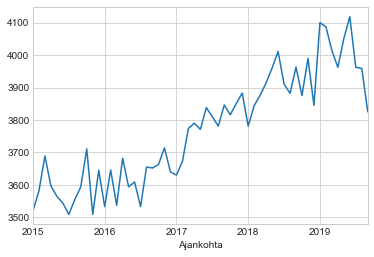

In [46]:
##### Piirretään pääkaupunkiseudun neliöhinnoista viivakuvio.

#### Viivakuvio on oletusarvo eikä sitä tarvitse erikseen kuviotyyppinä mainita.

hinnat['Pääkaupunkiseutu'].plot()

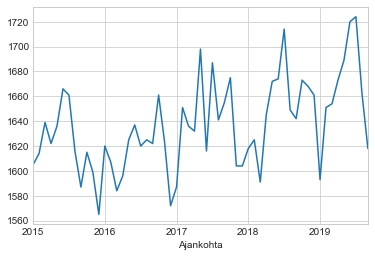

In [47]:
##### Samalla tavalla piirretään muun Suomen neliöhinnoista viivakuvio.

hinnat['Muu Suomi'].plot()

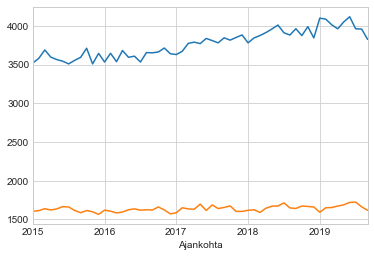

In [48]:
#### Entä kummatkin yhteen kuvioon. yhteen

hinnat['Pääkaupunkiseutu'].plot()
hinnat['Muu Suomi'].plot()

Laitetaan pääkaupunkiseudun asuntojen hintakuvio kuntoon.

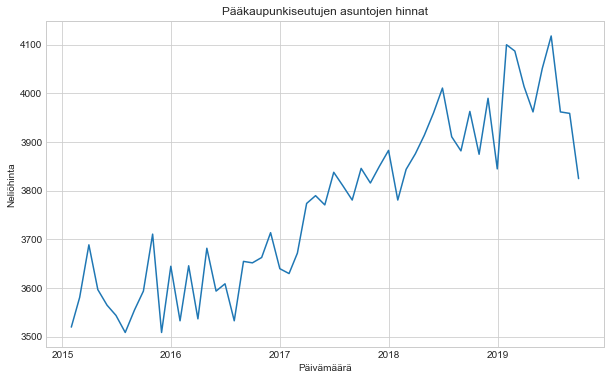

In [49]:
##### Luodaan figure- ja axes-oliot

fig1, ax1 = plt.subplots(figsize=(10,6))

##### Määritetään ax1-olio:

color = 'C0'
ax1.set(ylabel = 'Neliöhinta', xlabel = 'Päivämäärä', title = 'Pääkaupunkiseutujen asuntojen hinnat')

ax1.plot(hinnat['Pääkaupunkiseutu'], color=color)


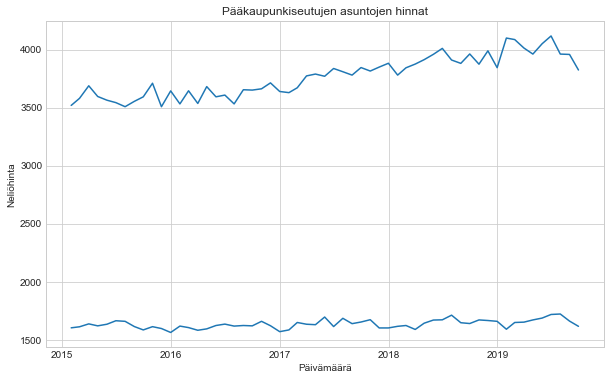

In [50]:
##### Jos tähän halutaan muun Suomen hinnat mukaan, lisätään ne samaan kuvaan

##### Luodaan figure- ja axes-oliot

fig1, ax1 = plt.subplots(figsize=(10,6))

##### Määritetään ax1-olio:

color = 'C0'
ax1.set(ylabel = 'Neliöhinta', xlabel = 'Päivämäärä', title = 'Pääkaupunkiseutujen asuntojen hinnat')

ax1.plot(hinnat['Pääkaupunkiseutu'], color=color)

ax1.plot(hinnat['Muu Suomi'], color=color)

In [51]:
#### Hankalampi tapaus on sellainen, jossa kummallekin tarvitaan oma pystyakseli. 

##### Luodaan toinen axes-olio, jolla on yhteinen x-akseli ax1-olion kanssa:

ax2 = ax1.twinx()

color = 'C1'
ax2.set_ylabel('Muun Suomen hinnat', color=color)
ax2.plot(hinnat['Muu Suomi'], color=color)
ax2.tick_params(axis='y', labelcolor=color, grid_color=color)

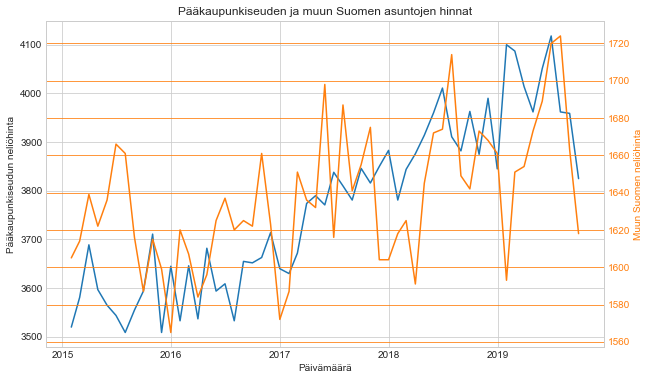

In [52]:
##### Lopuksi yhdistetään nämä kaksi.

##### Luodaan figure- ja axes-oliot

fig1, ax1 = plt.subplots(figsize=(10,6))

##### Määritetään ax1-olio:

color = 'C0'
ax1.set(ylabel = 'Pääkaupunkiseudun neliöhinta', xlabel = 'Päivämäärä', title = 'Pääkaupunkiseuden ja muun Suomen asuntojen hinnat')

ax1.plot(hinnat['Pääkaupunkiseutu'], color=color)

##### Luodaan toinen axes-olio, jolla on yhteinen x-akseli ax1-olion kanssa:

ax2 = ax1.twinx()

color = 'C1'
ax2.set_ylabel('Muun Suomen neliöhinta', color=color)
ax2.plot(hinnat['Muu Suomi'], color=color)
ax2.tick_params(axis='y', labelcolor=color, grid_color=color)

### Piirretään reaaliarvoja

Piirretään reaaliarvoista vastaava kuvaaja.

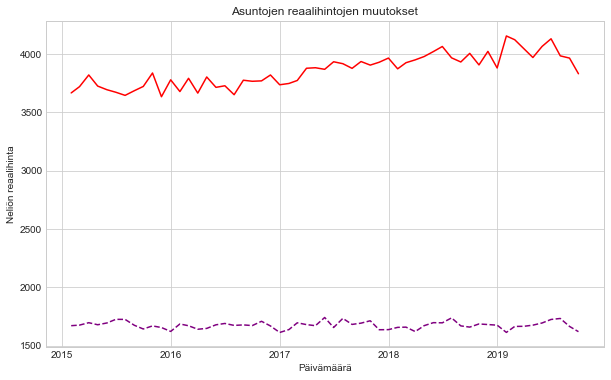

In [53]:
##### Piirretään reaaliarvot samaan kuvaan.

##### Luodaan figure- ja axes-oliot

fig_real, ax_real = plt.subplots(figsize=(10,6))

##### Määritetään ax-olio:

ax_real.set(ylabel = 'Neliön reaalihinta', xlabel = 'Päivämäärä', title = 'Asuntojen reaalihintojen muutokset')

ax_real.plot(reaaliarvot['PKS-reaali'], color='red', label = 'Pääkaupunkiseutu')

ax_real.plot(reaaliarvot['Muu-Suomi-reaali'], color='purple', label ='Muu Suomi', linestyle='dashed')

#### legend = True  ### ei toimi

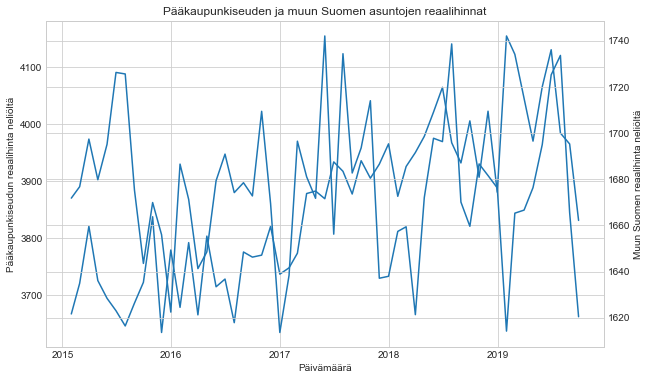

In [54]:
##### Piirretään nämä vielä samaan kuvioon.

##### Luodaan figure- ja axes-oliot

##### Tässä oli onglemia: subplotilla ei ollut coloria, linestyleä yms.

fig_real1, ax_real1 = plt.subplots(figsize=(10,6))

##### Määritetään ax1-olio:

color = 'C0'
ax_real1.set(ylabel = 'Pääkaupunkiseudun reaalihinta neliöltä', xlabel = 'Päivämäärä', title = 'Pääkaupunkiseuden ja muun Suomen asuntojen reaalihinnat')

ax_real1.plot(reaaliarvot['PKS-reaali'], label='Pääkaupunkiseudun reaalihinnat')

##### Luodaan toinen axes-olio, jolla on yhteinen x-akseli edellisen olion kanssa:

color = 'C2'
ax_real2 = ax_real1.twinx()

ax_real2.set(ylabel='Muun Suomen reaalihinta neliöltä', label='Muun Suomen reaalihinnat')
ax_real2.plot(reaaliarvot['Muu-Suomi-reaali'])
### ax_real2.tick_params(axis='y', labelcolor=color, grid_color=color)

### Piirretään indeksejä

Indekseillä kuvataan hintojen muutoksien suuruuksia ja suuntia. Niitä kuvataan tavallisesti viivakuviolla.

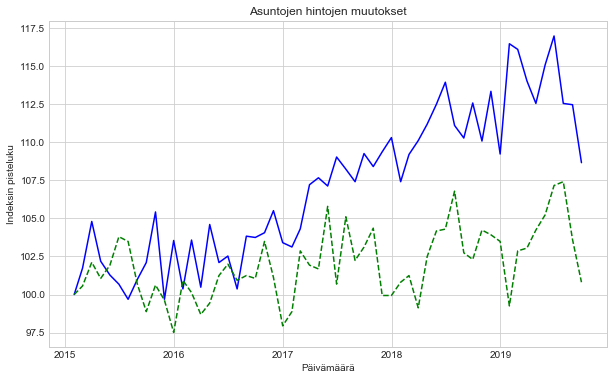

In [55]:
##### Piirretään indeksit samaan kuvaan.

##### Luodaan figure- ja axes-oliot

fig_index, ax_index = plt.subplots(figsize=(10,6))

##### Määritetään ax1-olio:


ax_index.set(ylabel = 'Indeksin pisteluku', xlabel = 'Päivämäärä', title = 'Asuntojen hintojen muutokset')

ax_index.plot(hinnat['PKS indeksi'], color='blue', label = 'Pääkaupunkiseutu')

ax_index.plot(hinnat['Muu Suomi indeksi'], color='green', label ='Muu Suomi', linestyle='dashed')

#### legend = True  ### ei toimi

Tarkastele ensin alkuperäisistä arvoista tehtyä viivakuviota. Näyttääkö sinusta siltä, että toinen arvoista muuttuu toista nopeammin? Entä jos vertaat samaa asiaa indekseistä? Mitä johtopätöksiä voit tehdä?

### Piirretään peräkkäisiä muutosprosentteja

Indeksien yhteydesä huomattiin, että siellä jokaista muutosta verrattiin aina yhteen lukuun, esim. ensimmäiseen hintatietoon. 

Toinen tapa on verrata muutosta edelliseen vuoteen. Edellä laskettiin aineistosta prosenttimuutoksia edellisen vuoden neliöhintoihin pääkaupunkiseudun ja muun Suomen asunnoista. Näitä kuvataan pylväskuviolla.Tehdään seuraavaksi vielä tälläinen kuvio.

Text(0.5, 0, 'Tarkasteluaika')

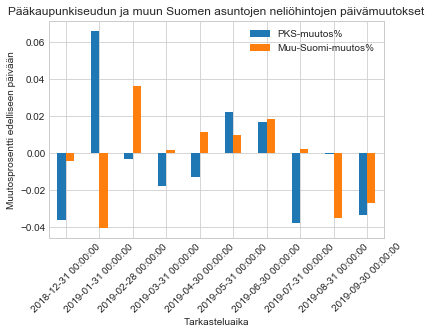

In [56]:
##### Tehdään viimeisen kymmenen arvon muutoksista pylväskaavio

##### Kuviotyyppi pitää nyt kertoa. 
##### Viimeiset kymmenen ja vaaka-akselin teksti 45 asteen kulmassa

ax_pera = muutokset[-10:].plot.bar(rot=45)

##### Pystyakselin otsikko

ax_pera.set_ylabel('Muutosprosentti edelliseen päivään')

##### Kuvion otsikko

ax_pera.set_title('Pääkaupunkiseudun ja muun Suomen asuntojen neliöhintojen päivämuutokset')

##### Vaaka-akselin otsikko

ax_pera.set_xlabel('Tarkasteluaika')

Käy läpi kymmenen viime havainnon kohdalta, milloin pääkaupunkisuedun ja muun Suomen neliöhinnat ovat nousseet ja milloin taas laskeneet. Mieti, miten se kuviossa näkyy. Erityisesti, kommentoi ovatko komanneksi viimeisen havainnon kohdalla muun Suomen neliöhinnat korkeammat vai alemmat kuin sitä edellisen vuoden neliöhinnat.

Kirjoitetaan vielä laskujemme tulokset Excel-tiedostoon.

In [57]:
##### Kirjoitetaan tietokehykset Excel-tiedostoon omalle samannimiselle välilehdelleen.

##### Kun kirjoitetaan yksi tietokehys Excel-tiedostoon, riittää seuraava.

hinnat.to_excel("muutoksen_kuvailu.xlsx", sheet_name='hinnat')


In [59]:
#### Kun kirjoitetaan samaan Excel-tiedostoon useampi välilehti, tarvitaan ExcelWriter-oliota.

#### muutokset, hinnat, rewaaliarvot, elinkustannusindeksi

with pd.ExcelWriter('muutoksen_kuvailu.xlsx') as writer:
    reaaliarvot.to_excel(writer, sheet_name='reaaliarvot')
    muutokset.to_excel(writer, sheet_name='muutokset')

### Lähteitä

Aki Taanilan materiaali https://tilastoapu.wordpress.com/python/

Muuta tekijän materiaalia http://www.haaga-helia.fi/~Teaching/

Juha Nurmonen
bit.ly/hhjuha